In [1]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('train_news.csv')

In [3]:
data

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...,...
20795,20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


In [4]:
# Checking Null values
data.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
Unnamed: 0    20800 non-null int64
id            20800 non-null int64
headline      20242 non-null object
written_by    18843 non-null object
news          20761 non-null object
label         20800 non-null int64
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


In [6]:
data['headline'].fillna('No Headline',inplace=True)

In [7]:
# Dropping Written_by column as there are many null values
data.drop(['written_by'],axis=1,inplace=True)

In [8]:
# Dropping the null news values as we are working on fake news so news we can drop
data = data.dropna(axis=0, subset=['news'])

In [9]:
data

,Unnamed: 0,id,headline,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...","AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...
20795,20795,5671,No Headline,"No, you'll be a dog licking of the vomit of yo...",1
20796,20796,14831,Albert Pike and the European Migrant Crisis,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,posted by Eddie You know the Dakota Access Pip...,1
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,"It’s officially summer, and the Society Boutiq...",0


In [10]:
data['news'].count()

20761

In [11]:
data.isnull().sum()

Unnamed: 0    0
id            0
headline      0
news          0
label         0
dtype: int64

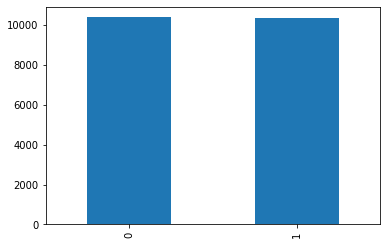

In [12]:
data['label'].value_counts().plot(kind = 'bar')

From the above we can see that the dataset is balanced dataset

In [13]:
data['headline_length'] = [len(str(a)) for a in data['headline']]
data['headline_length'].describe()

count    20761.000000
mean        72.574924
std         25.011968
min          3.000000
25%         59.000000
50%         75.000000
75%         87.000000
max        456.000000
Name: headline_length, dtype: float64

In [14]:
data['news_length'] = [len(str(a)) for a in data['news']]
data['news_length'].describe()

count     20761.000000
mean       4552.715380
std        5130.563491
min           1.000000
25%        1628.000000
50%        3361.000000
75%        6275.000000
max      142961.000000
Name: news_length, dtype: float64

In [15]:
#df= data.head(20)

In [16]:
# Merging the Headlines and news
data['Full_News'] = data[['headline', 'news']].apply(lambda x: ' '.join(x), axis = 1)

In [17]:
data

,Unnamed: 0,id,headline,news,label,headline_length,news_length,Full_News
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,84,7936,Ethics Questions Dogged Agriculture Nominee as...
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,HOUSTON — Venezuela had a plan. It was a ta...,0,72,6112,U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,"Sunday on ABC’s “This Week,” while discussing ...",0,100,425,Cotton to House: ’Do Not Walk the Plank and Vo...
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...","AUGUSTA, Me. — The beleaguered Republican g...",0,100,6516,"Paul LePage, Besieged Maine Governor, Sends Co..."
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham has written extensively on...,1,28,9164,A Digital 9/11 If Trump Wins Finian Cunningh...
...,...,...,...,...,...,...,...,...
20795,20795,5671,No Headline,"No, you'll be a dog licking of the vomit of yo...",1,11,69,"No Headline No, you'll be a dog licking of the..."
20796,20796,14831,Albert Pike and the European Migrant Crisis,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1,43,6621,Albert Pike and the European Migrant Crisis By...
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,posted by Eddie You know the Dakota Access Pip...,1,84,3433,Dakota Access Caught Infiltrating Protests to ...
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,"It’s officially summer, and the Society Boutiq...",0,55,2334,How to Stretch the Summer Solstice - The New Y...


In [18]:
## Importing more important libraries
from nltk.corpus import wordnet
import string
import nltk
import ast
import re
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import wordnet
from nltk.corpus import sentiwordnet

In [19]:
## Cleaining the text
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
def clean_text(text):
    text=str(text)
    text = text.lower()
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', text)
    rem_num = re.sub('[0-9]+', '', text)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)
data["Full_News"] = data["news"].apply(lambda x: clean_text(x))

In [20]:
data

,Unnamed: 0,id,headline,news,label,headline_length,news_length,Full_News
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,84,7936,washington sonny perdue telling georgians grow...
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,HOUSTON — Venezuela had a plan. It was a ta...,0,72,6112,houston venezuela plan tactical approach desig...
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,"Sunday on ABC’s “This Week,” while discussing ...",0,100,425,sunday abc week discussing republican plan rep...
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...","AUGUSTA, Me. — The beleaguered Republican g...",0,100,6516,augusta beleaguered republican governor maine ...
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham has written extensively on...,1,28,9164,finian cunningham written extensively internat...
...,...,...,...,...,...,...,...,...
20795,20795,5671,No Headline,"No, you'll be a dog licking of the vomit of yo...",1,11,69,dog licking vomit chinese overlords
20796,20796,14831,Albert Pike and the European Migrant Crisis,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1,43,6621,rixon stewart november rixon stewart nov migra...
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,posted by Eddie You know the Dakota Access Pip...,1,84,3433,posted eddie know dakota access pipeline prote...
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,"It’s officially summer, and the Society Boutiq...",0,55,2334,officially summer society boutique society mem...


In [21]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

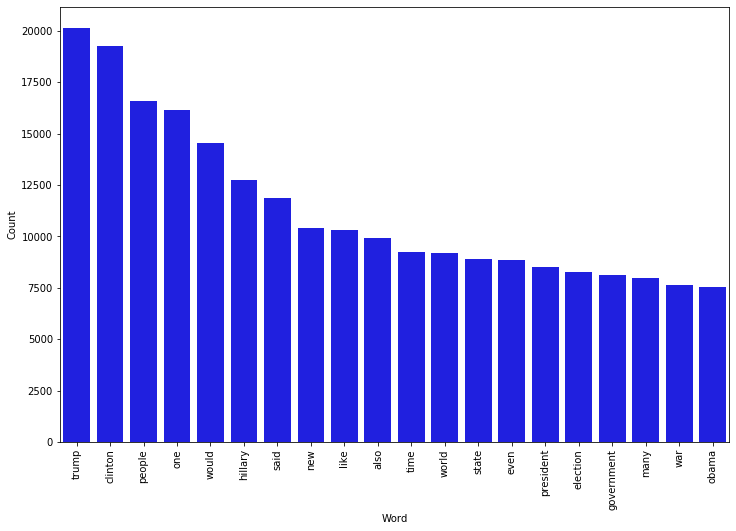

In [22]:
# Most frequent words in fake news
counter(data[data["label"] == 1], "Full_News", 20)

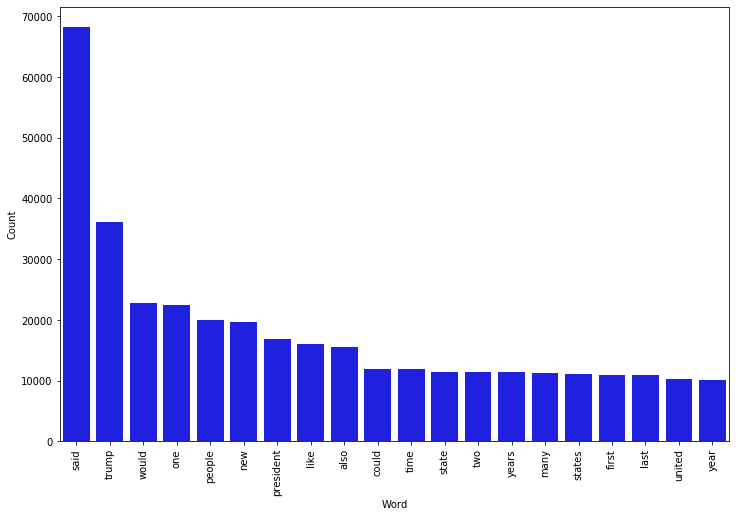

In [23]:
# Most frequent words in fake news
counter(data[data["label"] == 0], "Full_News", 20)

WordCloud

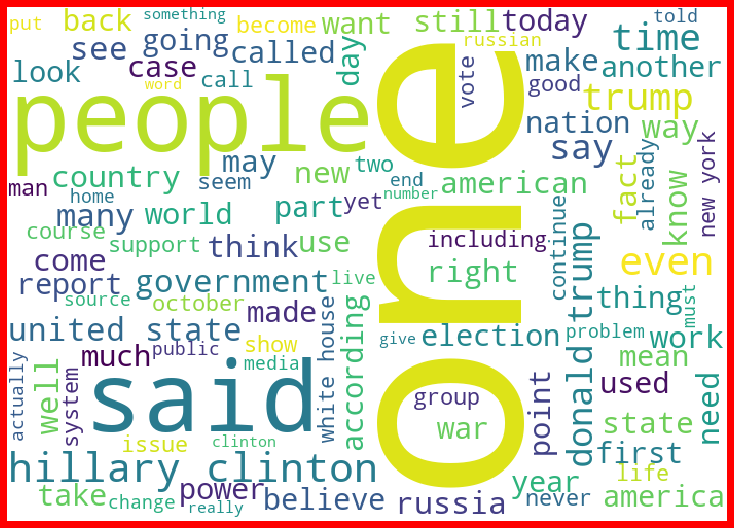

In [24]:
from wordcloud import WordCloud


fake = data['Full_News'][data['label']==1]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

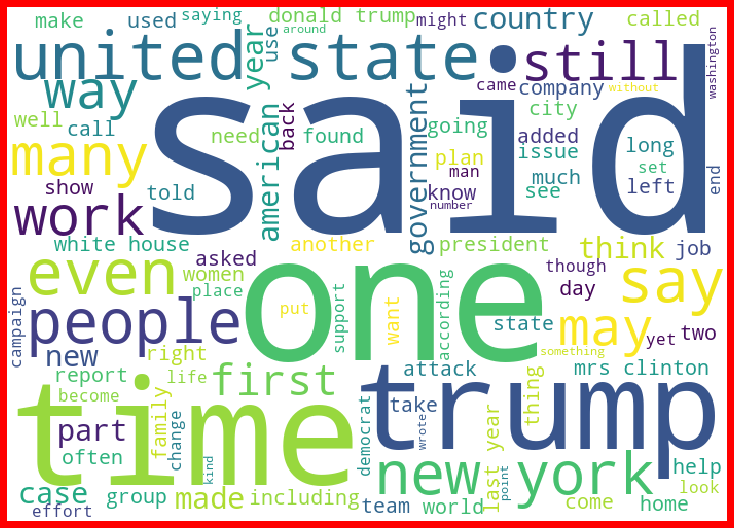

In [25]:
from wordcloud import WordCloud


Real = data['Full_News'][data['label']==0]

Real_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(Real))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(Real_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [26]:
y=data['label']

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tf_vec = TfidfVectorizer(ngram_range = (2,2))

x=tf_vec.fit_transform(data['Full_News'])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((16608, 4433615), (16608,), (4153, 4433615), (4153,))

In [29]:
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_curve,roc_auc_score,precision_score,f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import PassiveAggressiveClassifier

In [30]:
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=MultinomialNB()
RFC=RandomForestClassifier()
ETC=ExtraTreesClassifier()
PAC= PassiveAggressiveClassifier()

In [31]:
models = []
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('MultinomialNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('PasiveAggressiveClassifier',PAC))

*********************** LogisticRegression ***********************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_score =  0.9275222730556224


Cross_Val_Score =  0.9259675785863362


roc_auc_score =  0.9275171086577184


classification_report
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      2076
           1       0.91      0.95      0.93      2077

    accuracy                           0.93      4153
   macro avg       0.93      0.93      0.93      4153
weighted avg       0.93      0.93      0.93      4153



[[1881  195]
 [ 106 1971]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** DecisionTreeClassifier *************

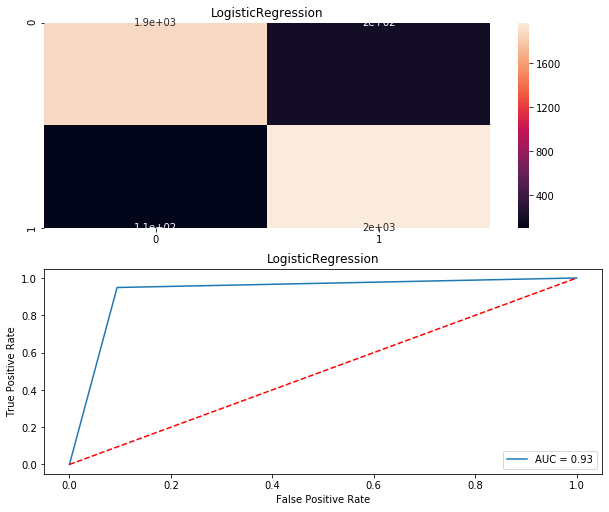

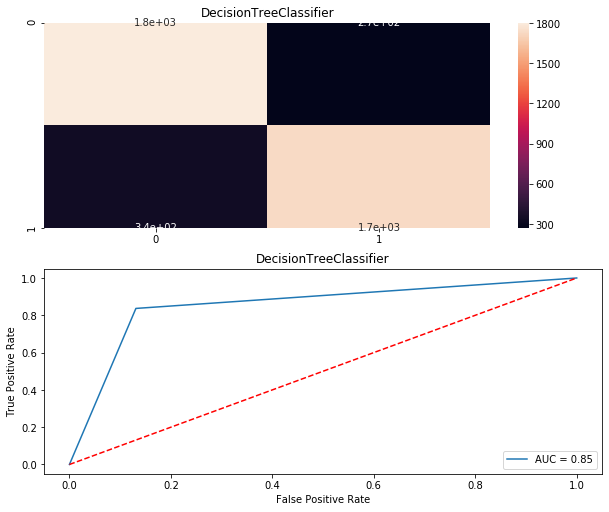

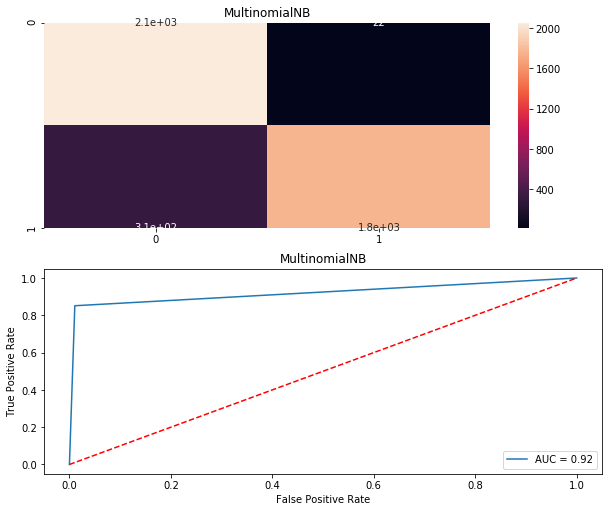

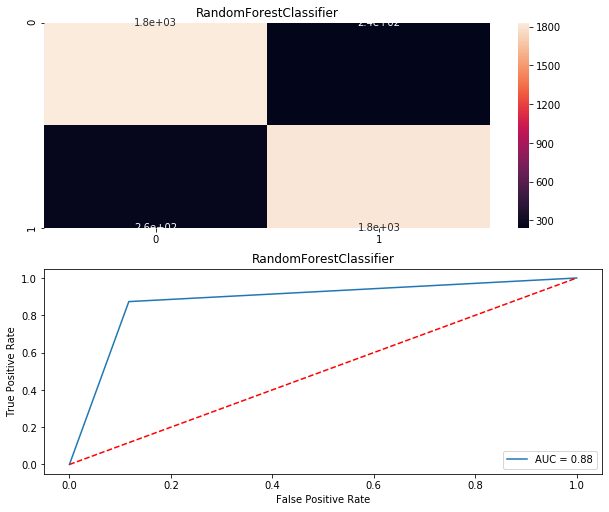

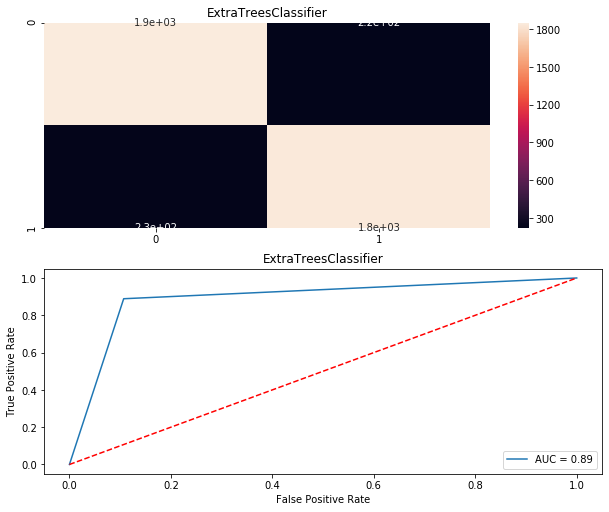

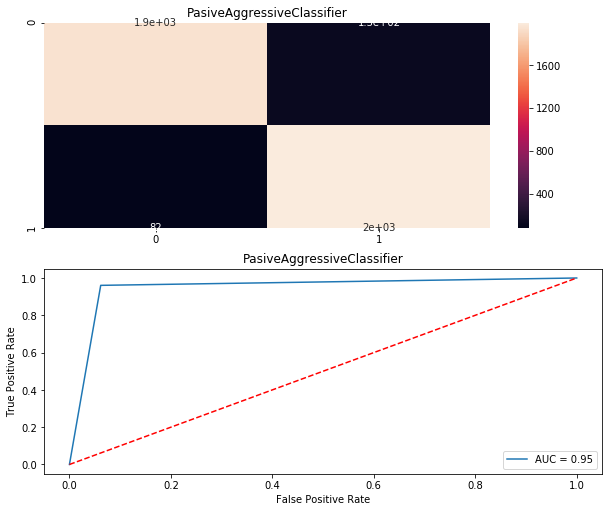

In [32]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [33]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,LogisticRegression,92.752227,92.596758,92.751711
1,DecisionTreeClassifier,85.287744,86.151972,85.288131
2,MultinomialNB,92.029858,92.211483,92.031521
3,RandomForestClassifier,87.816037,88.844667,87.816152
4,ExtraTreesClassifier,89.092222,89.798252,89.092274
5,PasiveAggressiveClassifier,94.943414,95.241093,94.943147


From the above we can see that pasive aggresive claissifier performed the best out of all other algorithms, so we will select the PassiveAgressiveClassifier as our final model.

In [38]:
fake = data[(data["label"] == 1)]
true = data[(data["label"] == 0)]

In [39]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [40]:
def basic_clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords= nltk.corpus.stopwords.words('english')
    words = re.split('\W+', text)
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
data1 = data.values
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
#tfIdf = tfIdfVectorizer.fit_transform(full_df["lemmatizing_text2"])
#tfIdf

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)